In [31]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 3  Exercícios II - Parte do trabalho computacional (Lista 5)
1. Use a projeção ortogonal para encontrar o plano
z
=
ax
+
by
+
c
que melhor se ajusta aos pontos
P
1
= (0
;
0
;
0)
,
P
2
= (1
;
0
;
3)
,
P
3
= (0
;
1
;
2)
;P
4
= (1
;
1
;
4)
e
P
5
= (3
;
2
;
6)
, no sentido dos mínimos quadrados.

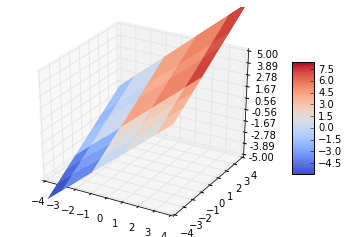

z = 1.28205128205x + 0.769230769231y + 1.10256410256


In [10]:
A = np.mat([[0, 0, 1], [1, 0, 1], [0, 1, 1], [1, 1, 1], [3, 2, 1]])
b = np.mat([0, 3, 2, 4, 6]).T
S = np.array(((A.T*A)**-1)*A.T*b)
a = S[0][0]
b = S[1][0]
c = S[2][0]
x = [2, 1, 4, 3, -1, -3, -4, -2];
y = [1, 2, 3, 4, -1, -2, -3, -4];
X, Y = np.meshgrid(x,y);
Z = a*X + b*Y +c; 
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
ax.set_zlim(-5, 5)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%0.2f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
print "z = "+str(a)+"x + "+str(b)+"y + "+str(c)

In [213]:
def get_eigvls(A):
    D,V = np.linalg.eig(A)
    temp = np.zeros([len(D),len(D)])
    for i in xrange(len(D)):
        temp[i][i] = D[i]
    D = temp
    return D, V

In [217]:
def dv_power(D,V,k):
    return np.array(V*(D**k)*(V**-1))

2.

In [218]:
A = np.mat([[2/float(3), 1/float(3)], [1/float(4), 3/float(4)]])
D,V = get_eigvls(A)

def robot_negotiation(D, V):
    k = 1
    while True:
        u1 = dv_power(D,V,k)
        if u1[1][0] >= u1[0][0]:
            return u1, k
        if k > 1000000:
            return False
        k = k + 1
val = robot_negotiation(D, V)
if val:
    print "Houve negociação"
    print "A^"+str(val[1]),"="
    u1 = val[0]
    print u1
    print "O valor negociado foi:",""+str((u1[0][0]+u1[1][0])/float(2))+"*x0 + "+str((u1[0][1]+u1[1][1])/float(2))+"*y0" 
else: 
    print "Nunca haverá negociação"

Houve negociação
A^42 =
[[ 0.42857143  0.57142857]
 [ 0.42857143  0.57142857]]
O valor negociado foi: 0.428571428571*x0 + 0.571428571429*y0


3.

In [184]:
M = np.mat([[0.5, 0.3, 0.1], [0.3, 0.4, 0.3], [0.2, 0.3, 0.6]])

a)

In [188]:
print "Autovalores de M = ",np.linalg.eigvals(M)

Autovalores de M =  [ 1.   0.4  0.1]


b)

In [233]:
D, V = get_eigvls(M)
M2 = dv_power(D,V,2)
S = np.array(np.mat(M2)*(np.mat([0, 0, 1]).T))
print "P(ruim) =",S[0][0]
print "P(regular) =",S[1][0]
print "P(boa) =",S[2][0]

P(ruim) = 0.2
P(regular) = 0.33
P(boa) = 0.47


c)

In [265]:
print "Supondo k = 1000000"
k = 1000000
D, V = get_eigvls(M)
Mk = dv_power(D,V,k)
print "Mk =",Mk
print "Assim x1000000 será igual a Mk*x0, qualquer que seja o x0"

Supondo k = 1000000
Mk = [[ 0.27777778  0.27777778  0.27777778]
 [ 0.33333333  0.33333333  0.33333333]
 [ 0.38888889  0.38888889  0.38888889]]
Assim x1000000 será igual a Mk*x0, qualquer que seja o x0


# 3  Exercícios II - Parte do trabalho computacional (Lista 6)

$1$. O arquivo Lobos.png contém uma imagem em preto e branco.  Converta para uma matriz
M
onde cada
entrada da matriz representa um tom de cinza.

In [3]:
import Image

In [28]:
img = Image.open('/home/marcio/Downloads/Lobos.png')

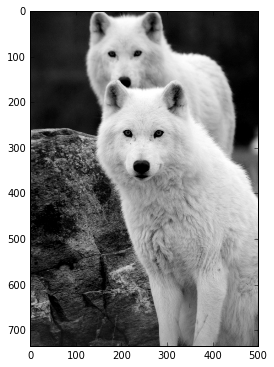

In [33]:
imgmat = np.array(list(img.getdata(band=0)), float)
imgmat.shape = (img.size[1], img.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray');

(a) Se cada pixel da imagem consome um byte, qual é o tamanho da imagem sem compressão?

In [26]:
x, y = img.size

R: O tamanho da imagem é:

In [27]:
print str(x*y), "bytes"

367500 bytes


(b) Mostre que toda matriz $A_{m \times n}$ de posto $r$  pode ser escrita como uma combinação linear positiva de $r$
matrizes de posto $1$ da seguinte forma: $A = \sigma_{1}u_{1}v_{1}^T + \dots + \sigma_{r}u_{r}v_{r}^T $
, onde os vetores $u_{i}$ são ortonormais e os vetores $v_{i}$ também são ortonormais.

R:
Se $posto(A) = r$, segue que $\sigma_{1} \geq \sigma_{2} \geq ... \geq \sigma_{r} > 0.$

Seja $\Sigma_{r}$ a matriz diagonal formada pelos valores singulares e 
$$
	A = U\begin{pmatrix}
			\Sigma_{r} & 0 \\
            0 & 0
		 \end{pmatrix} V^{T}
$$

Particionando os autovetores conforme os valores singulares, temos:
$$
	U = (U_{r} U_{m-r})
$$

$$
	V = (V_{r} V_{n-r})
$$

O que leva a 
$$A =U_{r}\Sigma_{r}V^{T}_{r} = \begin{pmatrix}
 \sigma_{1}u_{1} & ... & \sigma_{r}u_{r}
\end{pmatrix}\begin{pmatrix}
v_{1}^{T} \\ . \\ . \\ . \\ v_{r}^{T}
\end{pmatrix} = \sum_{j=1}^{r}\sigma_{j}u_{j}v_{j}^{T}
$$

(c) Use o item anterior para fazer uma compressão que use 1/16 do tamanho original da imagem.

In [35]:
U, sigma, V = np.linalg.svd(imgmat)

In [83]:
print U.shape, V.shape, sigma.shape

(735, 735) (500, 500) (500,)


In [69]:
v = 1/float(16)

In [101]:
qnt_vet = x*y*v/float(735 + 500 +1)
print qnt_vet

18.583131068


In [99]:
qnt_vet = int(qnt_vet)+1
print qnt_vet

20


Tem-se que $\frac{\frac{1}{16}*750*500}{750+1+500} = 18.583131068$, portanto a imagem compactada será:

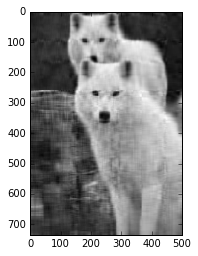

In [104]:
reconstimg = np.matrix(U[:, :19]) * np.diag(sigma[:19]) * np.matrix(V[:19, :])
plt.imshow(reconstimg, cmap='gray');

$2$. O arquivo Pontos.csv contém as coordenadas x e y de 128 pontos dispostos em duas colunas. Encontre a reta
r
cuja soma das distâncias dos pontos à reta é a menor possível.

In [176]:
from numpy import genfromtxt
my_data = genfromtxt('/home/marcio/Downloads/Pontos.csv', delimiter=',')

In [177]:
x = my_data[:,:1]
y = np.mat(my_data[:,1:])

In [178]:
M = np.ones((x.size,2))

In [179]:
M[:,1:] = x

In [180]:
M = np.mat(M)

In [181]:
v = ((M.T*M)**-1)*M.T*y

In [182]:
v = np.array(v)

In [183]:
def func(i, v):
    return (v[0]+v[1]*i)[0]

In [184]:
Y = []
for i in x:
    a = func(i, v)
    Y.append(a)

a reta que mais se aproxima dos pontos é

In [189]:
print "y =",v[0][0],"+", v[1][0],"x"

y = -0.423204725531 + 0.643742697991 x


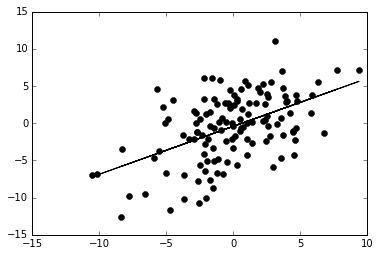

In [190]:
plt.plot(x,y,'ko',x,Y,'k-')
plt.show()